In [6]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 from sklearn.linear_model import LinearRegression, Ridge, Lasso
 from sklearn.model_selection import train_test_split
 from sklearn.metrics import mean_squared_error, r2_score
 from sklearn.preprocessing import StandardScaler

In [7]:
 df=pd.read_csv(r"C:\Users\Lenovo\OneDrive\Documents\DATA_ANALYTICS\ML\uber.csv")

In [8]:
df


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [12]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [16]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [18]:
 df.drop(['Unnamed: 0', 'key'], axis=1, inplace=True)

In [20]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [24]:
# Drop rows with missing values
df= df.dropna()

In [26]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


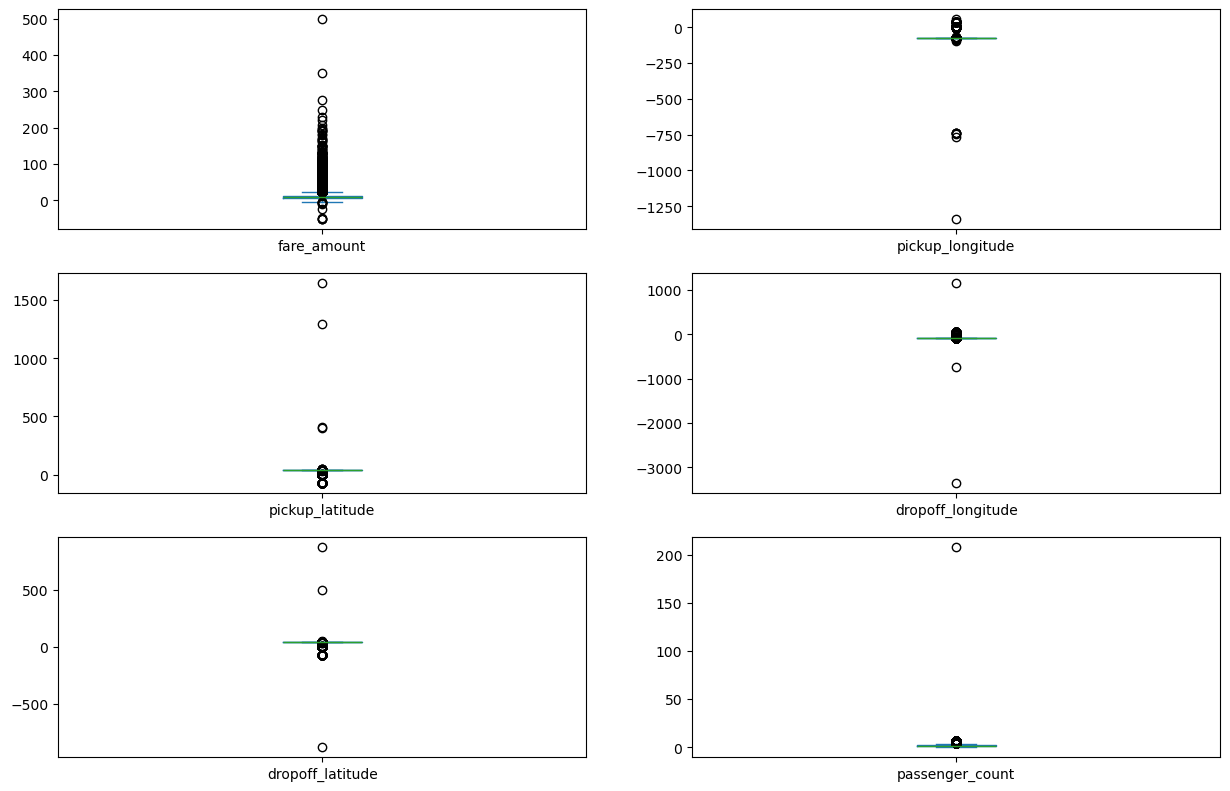

In [28]:
 # Identify outliers using box plots
 df.plot(kind = "box",subplots = True,layout = (6,2),figsize=(15,20))
 plt.show()

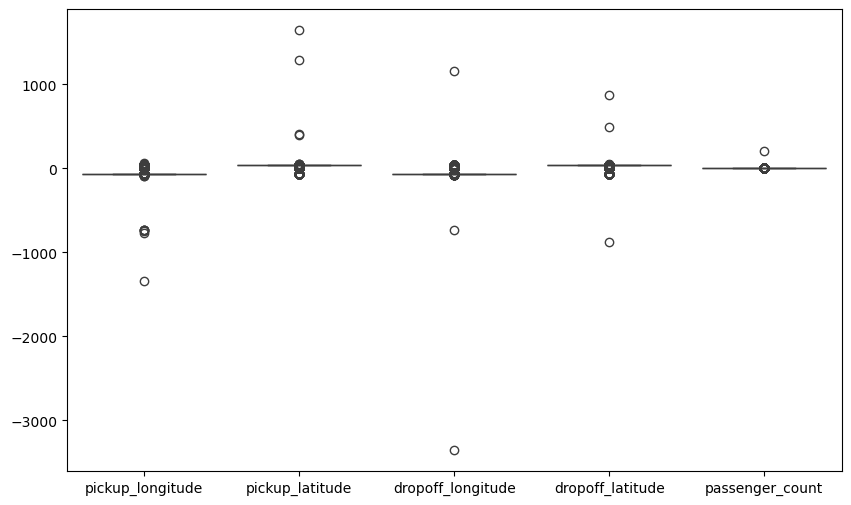

In [30]:
 features = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
 plt.figure(figsize =(10,6))
 sns.boxplot(data = features)
 plt.show()

In [39]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# ✅ Columns to check for outliers (relevant for Uber dataset)
columns_to_check = [
    'fare_amount', 
    'pickup_longitude', 
    'pickup_latitude', 
    'dropoff_longitude', 
    'dropoff_latitude', 
    'passenger_count'
]

# ✅ Make a copy to keep original data safe
data_cleaned = df.copy()

# ✅ Apply outlier removal for each column
for column in columns_to_check:
    data_cleaned = remove_outliers(data_cleaned, column)

# ✅ Print dataset shape before and after cleaning
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", data_cleaned.shape)


Original dataset shape: (199999, 7)
Cleaned dataset shape: (148074, 7)


In [41]:
features1 = data_cleaned[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
target = data_cleaned['fare_amount']

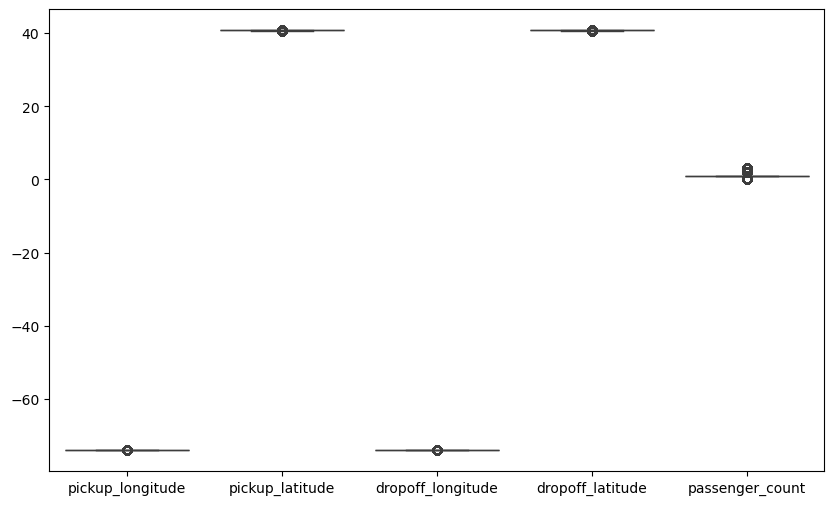

In [47]:
 # Identify outliers using box plots if reamining
 plt.figure(figsize=(10, 6))
 sns.boxplot(data=features1)
 plt.show()

Non-numeric columns to be handled: Index(['pickup_datetime'], dtype='object')


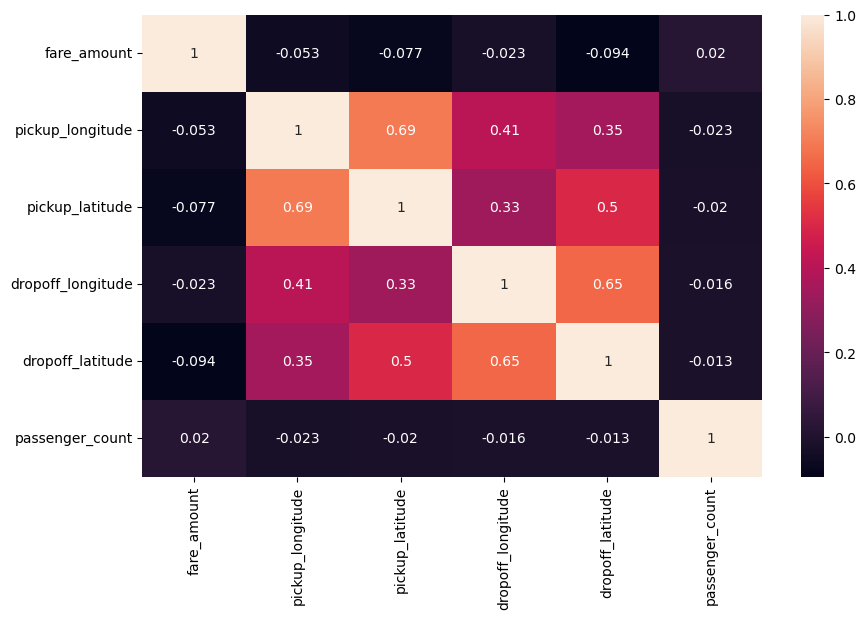

In [49]:
 # Check for non-numeric columns
 non_numeric_cols = data_cleaned.select_dtypes(exclude=[np.number]).columns
 print("Non-numeric columns to be handled:", non_numeric_cols)
 # Drop non-numeric columns for correlation calculation
 data_numeric = data_cleaned.select_dtypes(include=[np.number])
 # Correlation matrix
 correlation_matrix = data_numeric.corr()
 plt.figure(figsize=(10, 6))
 sns.heatmap(correlation_matrix, annot=True)
 plt.show()

In [51]:
 # Check for missing values
 df.isnull().sum()


fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [53]:
df = df.drop_duplicates()



In [55]:
 # Filter valid coordinates
 df = df[
    (df['pickup_latitude'].between(-90, 90)) &
    (df['dropoff_latitude'].between(-90, 90)) &
    (df['pickup_longitude'].between(-180, 180)) &
    (df['dropoff_longitude'].between(-180, 180))
 ]

In [61]:
pip install geopy

In [62]:


from geopy.distance import geodesic
def calculate_distance(row):
    pickup = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff = (row['dropoff_latitude'], row['dropoff_longitude'])
    return geodesic(pickup, dropoff).km

df['distance_km'] = df.apply(calculate_distance, axis=1)



In [65]:
 #Remove fares <= 0 or very large (outliers):
 df = df[(df['fare_amount'] > 0) & (df['fare_amount'] < 100)]
 df = df[df['distance_km'] < 100]

In [67]:
 #Extract useful features:
 df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
 df['hour'] = df['pickup_datetime'].dt.hour
 df['day'] = df['pickup_datetime'].dt.dayofweek
 df['month'] = df['pickup_datetime'].dt.month

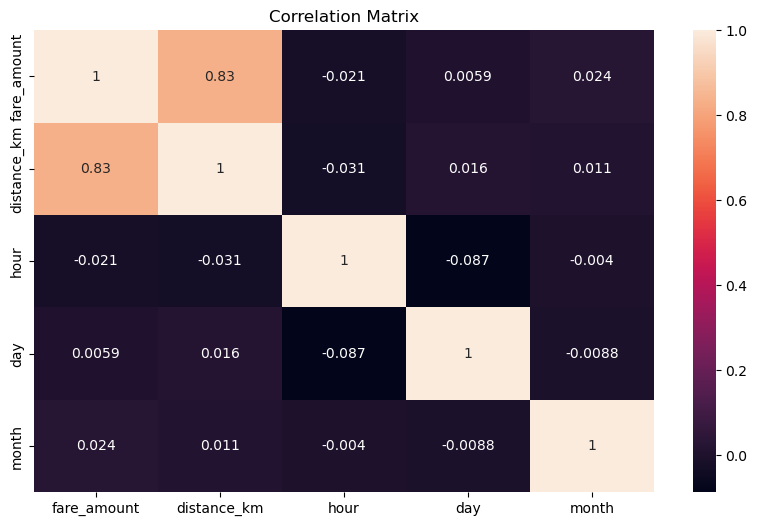

In [68]:
 plt.figure(figsize=(10,6))
 sns.heatmap(df[['fare_amount', 'distance_km', 'hour', 'day', 'month']].corr(), annot=True)
 plt.title('Correlation Matrix')
 plt.show()

In [71]:
 #prepare data for modeling
 features = ['distance_km', 'hour', 'day', 'month']
 X = df[features]
 y = df['fare_amount']
 # Scale features
 scaler = StandardScaler()
 X_scaled = scaler.fit_transform(X)
 # Train-test split
 X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [73]:
 lr = LinearRegression()
 lr.fit(X_train, y_train)

LinearRegression()

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr.predict(X_test)

# Evaluate model
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("🔹 Linear Regression Results:")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R² Score: {r2_lr:.4f}")

🔹 Linear Regression Results:
RMSE: 5.11
R² Score: 0.7057


In [95]:
# Train the model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predict on test data
y_pred_ridge = ridge.predict(X_test)

# Evaluate model
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print("🔹 Ridge Regression Results:")
print(f"RMSE: {rmse_ridge:.2f}")
print(f"R² Score: {r2_ridge:.4f}")

🔹 Ridge Regression Results:
RMSE: 5.11
R² Score: 0.7057


In [97]:

# Train the model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predict on test data
y_pred_lasso = lasso.predict(X_test)

# Evaluate model
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print("🔹 Lasso Regression Results:")
print(f"RMSE: {rmse_lasso:.2f}")
print(f"R² Score: {r2_lasso:.4f}")

🔹 Lasso Regression Results:
RMSE: 5.11
R² Score: 0.7049


In [99]:
print(f"Linear Regression R²: {r2_lr:.4f}")
print(f"Ridge Regression R²: {r2_ridge:.4f}")
print(f"Lasso Regression R²: {r2_lasso:.4f}")

Linear Regression R²: 0.7057
Ridge Regression R²: 0.7057
Lasso Regression R²: 0.7049


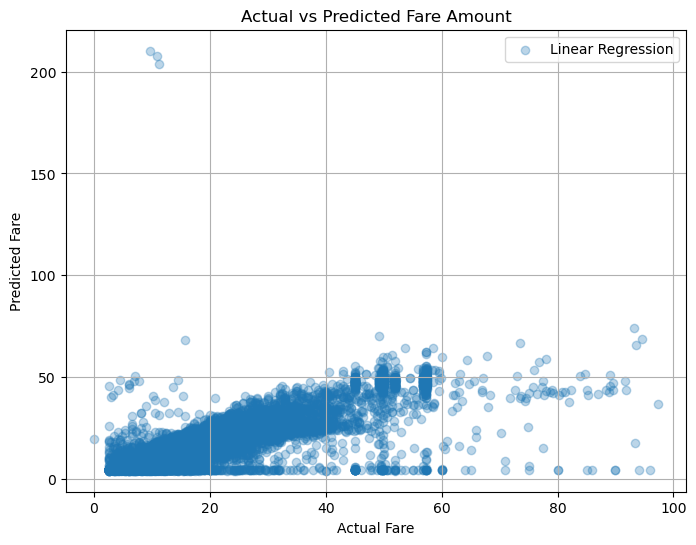

In [101]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lr, alpha=0.3, label='Linear Regression')
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted Fare Amount")
plt.legend()
plt.grid(True)
plt.show()

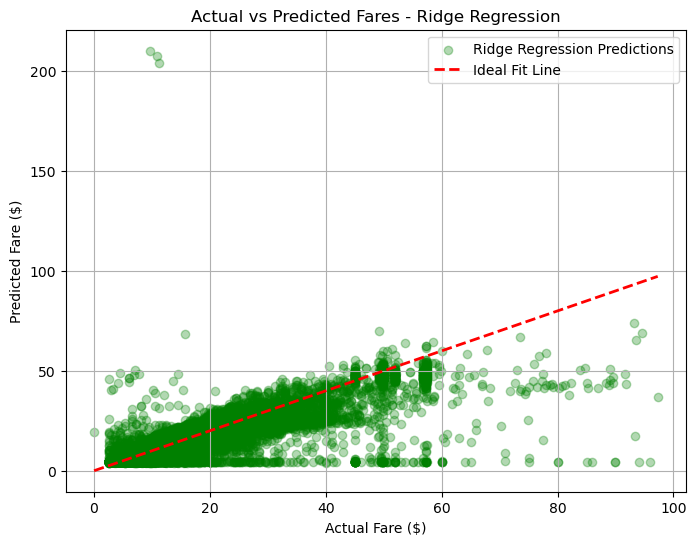

In [103]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_ridge, alpha=0.3, color='green', label='Ridge Regression Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit Line')
plt.xlabel("Actual Fare ($)")
plt.ylabel("Predicted Fare ($)")
plt.title("Actual vs Predicted Fares - Ridge Regression")
plt.legend()
plt.grid(True)
plt.show()

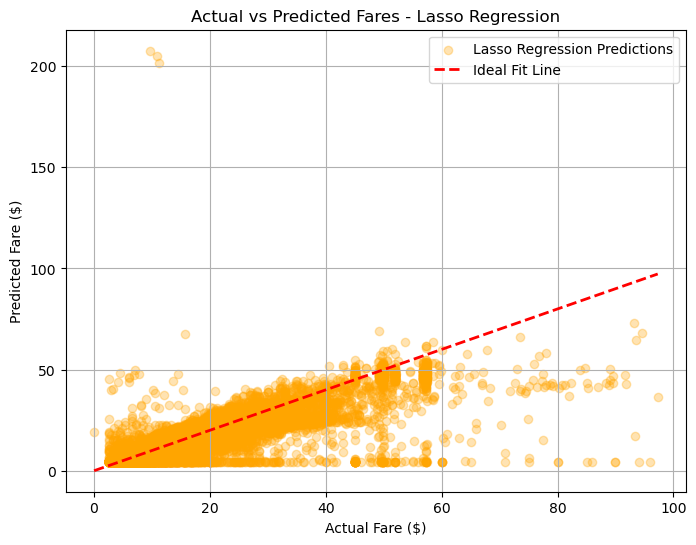

In [105]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lasso, alpha=0.3, color='orange', label='Lasso Regression Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit Line')
plt.xlabel("Actual Fare ($)")
plt.ylabel("Predicted Fare ($)")
plt.title("Actual vs Predicted Fares - Lasso Regression")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 from sklearn.linear_model import LinearRegression, Ridge, Lasso
 from sklearn.model_selection import train_test_split
 from sklearn.metrics import mean_squared_error, r2_score
 from sklearn.preprocessing import StandardScaler

 df=pd.read_csv(r"C:\Users\Lenovo\OneDrive\Documents\DATA_ANALYTICS\ML\uber.csv")
 df
 df.head()
df.info()
df.columns

 df.drop(['Unnamed: 0', 'key'], axis=1, inplace=True)
df= df.dropna()
df

 # Identify outliers using box plots
 df.plot(kind = "box",subplots = True,layout = (6,2),figsize=(15,20))
 plt.show()

 features = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
 plt.figure(figsize =(10,6))
 sns.boxplot(data = features)
 plt.show()



def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# ✅ Columns to check for outliers (relevant for Uber dataset)
columns_to_check = [
    'fare_amount', 
    'pickup_longitude', 
    'pickup_latitude', 
    'dropoff_longitude', 
    'dropoff_latitude', 
    'passenger_count'
]

# ✅ Make a copy to keep original data safe
data_cleaned = df.copy()

# ✅ Apply outlier removal for each column
for column in columns_to_check:
    data_cleaned = remove_outliers(data_cleaned, column)

# ✅ Print dataset shape before and after cleaning
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", data_cleaned.shape)


features1 = data_cleaned[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
target = data_cleaned['fare_amount']

 # Identify outliers using box plots if reamining
 plt.figure(figsize=(10, 6))
 sns.boxplot(data=features1)
 plt.show()


 # Check for non-numeric columns
 non_numeric_cols = data_cleaned.select_dtypes(exclude=[np.number]).columns
 print("Non-numeric columns to be handled:", non_numeric_cols)
 # Drop non-numeric columns for correlation calculation
 data_numeric = data_cleaned.select_dtypes(include=[np.number])
 # Correlation matrix
 correlation_matrix = data_numeric.corr()
 plt.figure(figsize=(10, 6))
 sns.heatmap(correlation_matrix, annot=True)
 plt.show()

 # Check for missing values
 df.isnull().sum()
df = df.drop_duplicates()

 # Filter valid coordinates
 df = df[
    (df['pickup_latitude'].between(-90, 90)) &
    (df['dropoff_latitude'].between(-90, 90)) &
    (df['pickup_longitude'].between(-180, 180)) &
    (df['dropoff_longitude'].between(-180, 180))
 ]

pip install geopy
from geopy.distance import geodesic
def calculate_distance(row):
    pickup = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff = (row['dropoff_latitude'], row['dropoff_longitude'])
    return geodesic(pickup, dropoff).km

df['distance_km'] = df.apply(calculate_distance, axis=1)


 #Remove fares <= 0 or very large (outliers):
 df = df[(df['fare_amount'] > 0) & (df['fare_amount'] < 100)]
 df = df[df['distance_km'] < 100]

 #Extract useful features:
 df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
 df['hour'] = df['pickup_datetime'].dt.hour
 df['day'] = df['pickup_datetime'].dt.dayofweek
 df['month'] = df['pickup_datetime'].dt.month

 plt.figure(figsize=(10,6))
 sns.heatmap(df[['fare_amount', 'distance_km', 'hour', 'day', 'month']].corr(), annot=True)
 plt.title('Correlation Matrix')
 plt.show()


 #prepare data for modeling
 features = ['distance_km', 'hour', 'day', 'month']
 X = df[features]
 y = df['fare_amount']
 # Scale features
 scaler = StandardScaler()
 X_scaled = scaler.fit_transform(X)
 # Train-test split
 X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

 lr = LinearRegression()
 lr.fit(X_train, y_train)


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr.predict(X_test)

# Evaluate model
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)




print("🔹 Linear Regression Results:")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R² Score: {r2_lr:.4f}")

# Train the model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predict on test data
y_pred_ridge = ridge.predict(X_test)

# Evaluate model
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print("🔹 Ridge Regression Results:")
print(f"RMSE: {rmse_ridge:.2f}")
print(f"R² Score: {r2_ridge:.4f}")



# Train the model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predict on test data
y_pred_lasso = lasso.predict(X_test)

# Evaluate model
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print("🔹 Lasso Regression Results:")
print(f"RMSE: {rmse_lasso:.2f}")
print(f"R² Score: {r2_lasso:.4f}")


print(f"Linear Regression R²: {r2_lr:.4f}")
print(f"Ridge Regression R²: {r2_ridge:.4f}")
print(f"Lasso Regression R²: {r2_lasso:.4f}")


plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lr, alpha=0.3, label='Linear Regression')
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted Fare Amount")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_ridge, alpha=0.3, color='green', label='Ridge Regression Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit Line')
plt.xlabel("Actual Fare ($)")
plt.ylabel("Predicted Fare ($)")
plt.title("Actual vs Predicted Fares - Ridge Regression")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lasso, alpha=0.3, color='orange', label='Lasso Regression Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit Line')
plt.xlabel("Actual Fare ($)")
plt.ylabel("Predicted Fare ($)")
plt.title("Actual vs Predicted Fares - Lasso Regression")
plt.legend()
plt.grid(True)
plt.show()
